# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
 
 -A used car company will need to know how much they can pay for a car by understanding what they can sell that car for. They will need to know how much margin they have when purchasing inventory.

### **The objective:**

 - What is the intended goal?
 - To preidct the price we can sell used cars for.

### **The key questions:**

- What are the key questions that need to be answered?
- Which features of a car contribute to predicting the price it will sell for. In other words, what features do customers value most?

### **The problem formulation**:

- What is it that we are trying to solve using data science?
- We are trying to use the features from the data set to predict the price we can sell cars for.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### **Let us load the data**

In [2]:
df = pd.read_csv("C:/Users/14342/Desktop/used_cars.csv") #turning data into a dataframe. This will not change the original Data.

df.head()  #Display the first 5 rows of our data set 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


## Data Overview

- Observations
- Sanity checks

In [3]:
df.info() #Summary of data / data type of each column. There are 5 objects, the rest are float or integers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [4]:
df.shape #Display the dimensions of our dataset 7253 non-null observations in each of the columns. There are 14 columns in the dataset and all but 5 columns are of numeric data type.

(7253, 14)

In [5]:
df.isnull() #Check for missing values

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7249,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7250,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7251,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [6]:
(df.isnull().sum() / df.shape[0]) * 100 #Percentage of missing values per column 

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 2.412795
Seats                 0.730732
New_price            86.129877
Price                17.013650
dtype: float64

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [7]:
df.describe().T #Statistical summary of our data // Mean, Standard deviation, Minimum value, 1st percentile, 2nd percentile, 3rd percentile of the columns with numeric values. Counts the number of variables in dataset


,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


In [8]:
df.describe(include=['object']).T #Statistical summary for the objects.

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


In [9]:
cat_cols = df.select_dtypes(include = ['object']).columns #Number of unique observations in each object.

for column in cat_cols:
    print("For column:", column)
    print(df[column].value_counts())
    print('-'*50)


For column: Name
Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: count, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric 

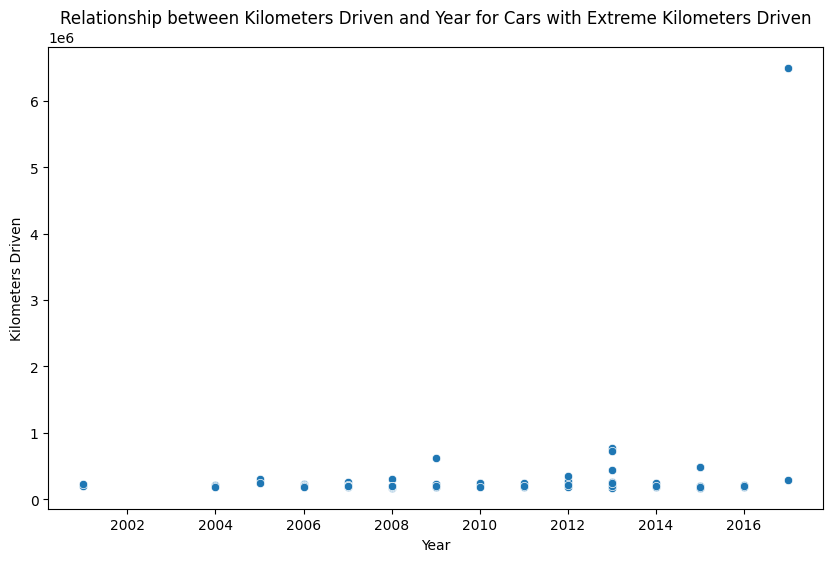

In [10]:
# Filter cars with extreme values of kilometers_driven
extreme_kms = df[df['Kilometers_Driven'] > df['Kilometers_Driven'].quantile(0.99)]

# Plot the relationship between kilometers_driven and Year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=extreme_kms, x='Year', y='Kilometers_Driven')
plt.xlabel('Year')
plt.ylabel('Kilometers Driven')
plt.title('Relationship between Kilometers Driven and Year for Cars with Extreme Kilometers Driven')
plt.show()


In [11]:
df.sort_values('Price', ascending=False).head(10) #Viewing top 10 Price values

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
4079,4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.00,5.0,230.0,160.00
5781,5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.00,2.0,NaN,120.00
5919,5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.10,2.0,NaN,100.00
1505,1505,Land Rover Range Rover Sport SE,Kochi,2019,26013,Diesel,Automatic,First,12.65,2993.0,255.00,5.0,139.0,97.07
1974,1974,BMW 7 Series 740Li,Coimbatore,2018,28060,Petrol,Automatic,First,12.05,2979.0,320.00,5.0,NaN,93.67
1984,1984,BMW 7 Series 740Li,Bangalore,2017,17465,Petrol,Automatic,First,12.05,2979.0,320.00,5.0,NaN,93.00
4691,4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,12.00,5461.0,421.00,2.0,NaN,90.00
5535,5535,BMW X6 xDrive 40d M Sport,Ahmedabad,2015,97003,Diesel,Automatic,First,15.87,2993.0,308.43,5.0,NaN,85.00
2095,2095,Mercedes-Benz SLC 43 AMG,Coimbatore,2019,2526,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,106.0,83.96
1885,1885,Mercedes-Benz GLS 350d Grand Edition,Delhi,2018,6000,Diesel,Automatic,First,11.00,2987.0,258.00,7.0,102.0,79.00


In [12]:
df.sort_values('Price', ascending=False).tail(10) #Viewing last 10 Price values

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7243,7243,Renault Duster 85PS Diesel RxL,Chennai,2015,70000,Diesel,Manual,First,19.87,1461.0,83.8,5.0,NaN,NaN
7244,7244,Chevrolet Aveo 1.4 LS,Pune,2009,45463,Petrol,Manual,First,14.49,1399.0,92.7,5.0,NaN,NaN
7245,7245,Honda Amaze S i-Vtech,Kochi,2015,44776,Petrol,Manual,First,18.00,1198.0,86.7,5.0,NaN,NaN
7246,7246,Hyundai Grand i10 AT Asta,Coimbatore,2016,18242,Petrol,Automatic,First,18.90,1197.0,82.0,5.0,NaN,NaN
7247,7247,Hyundai EON D Lite Plus,Coimbatore,2015,21190,Petrol,Manual,First,21.10,814.0,55.2,5.0,NaN,NaN
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


In [13]:
df.sort_values('Kilometers_Driven', ascending=False).head(10) #Viewing top 10 Kilometers_Driven values

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


In [14]:
#Drop the outlier
df.drop(2328, inplace=True)

In [15]:
df.sort_values('Mileage', ascending=False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
3129,3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54,998.0,67.04,5.0,5.35,3.25
2371,2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54,998.0,67.04,5.0,5.54,3.90
2059,2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54,998.0,67.04,5.0,5.58,3.05
4141,4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54,998.0,67.04,5.0,5.58,2.85
1332,1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54,998.0,67.04,5.0,5.54,2.96
3553,3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,33.44,796.0,40.30,4.0,NaN,3.00
3869,3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537,CNG,Manual,Second,33.44,796.0,40.30,4.0,NaN,2.10
1269,1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.44,796.0,40.30,4.0,NaN,3.50
4769,4769,Maruti Alto 800 2016-2019 CNG LXI,Kochi,2017,24310,CNG,Manual,First,33.44,796.0,40.30,4.0,NaN,3.70
6788,6788,Maruti Alto K10 LXI CNG Optional,Delhi,2017,33000,CNG,Manual,First,32.26,998.0,58.20,4.0,4.66,NaN


In [16]:
df.sort_values('Mileage', ascending=False).tail(10) #Last 10 values for Milage showing the zeros. 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
5022,5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,1.93
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,NaN,6.99
4704,4704,Mercedes-Benz M-Class ML 350 4Matic,Bangalore,2015,20000,Diesel,Automatic,First,0.0,2987.0,165.0,5.0,NaN,47.35
4687,4687,Land Rover Freelander 2 TD4 SE,Jaipur,2012,119203,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,16.50
1259,1259,Land Rover Freelander 2 TD4 S,Bangalore,2010,125000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,11.00
1345,1345,Maruti Baleno Vxi,Pune,2005,70000,Petrol,Manual,First,0.0,1590.0,NaN,5.0,NaN,1.30
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75


In [17]:
df.tail() #Display the last 5 rows of our dataset

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


In [18]:
df.value_counts().T

S.No.  Name                             Location    Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  Power   Seats  New_price  Price
2      Honda Jazz V                     Chennai     2011  46000              Petrol     Manual        First       18.20    1199.0  88.70   5.0    8.61       4.50     1
4104   Skoda Superb Style 1.8 TSI AT    Coimbatore  2016  54253              Petrol     Automatic     First       14.67    1798.0  177.46  5.0    30.19      16.81    1
4022   Toyota Corolla Altis 1.8 GL      Chennai     2009  32000              Petrol     Manual        Second      14.28    1798.0  138.03  5.0    22.66      4.95     1
4026   Maruti Alto K10 VXI              Jaipur      2016  51264              Petrol     Manual        First       24.07    998.0   67.10   5.0    4.24       3.20     1
4028   Mercedes-Benz CLA 200 CGI Sport  Delhi       2016  40000              Petrol     Automatic     First       15.04    1991.0  183.00  5.0    41.02      24.50   

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perform the log_transformation(if needed) and write down your observations?

In [19]:
#Dropping the "S.No." column
df.drop(columns = "S.No.", inplace = True)

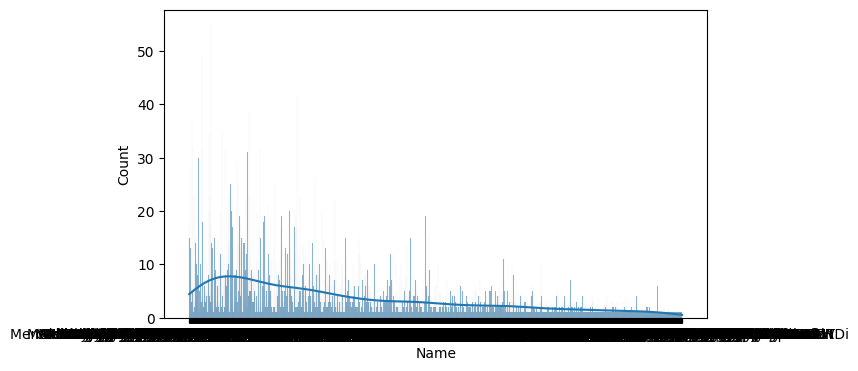

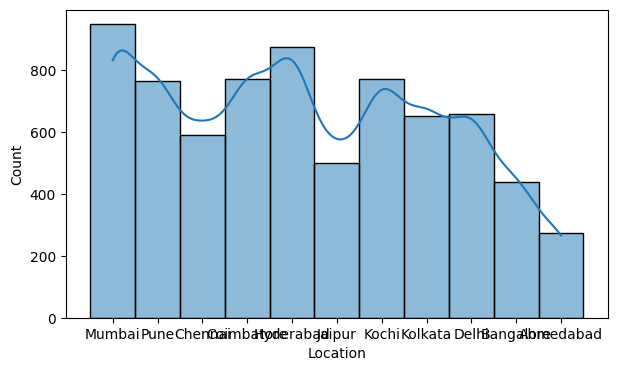

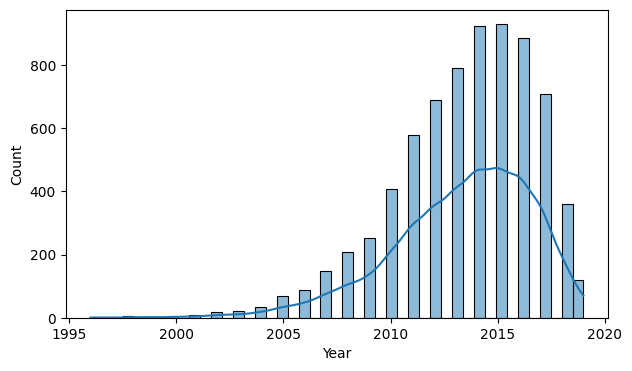

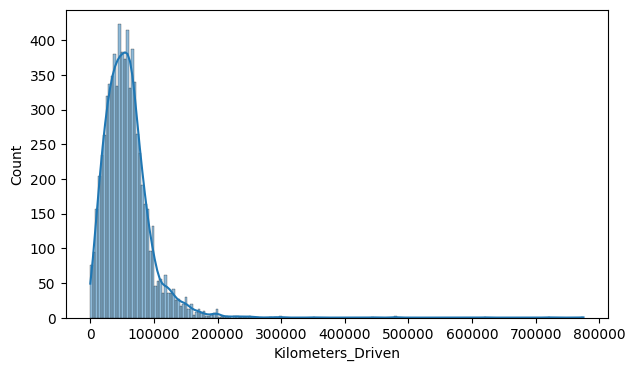

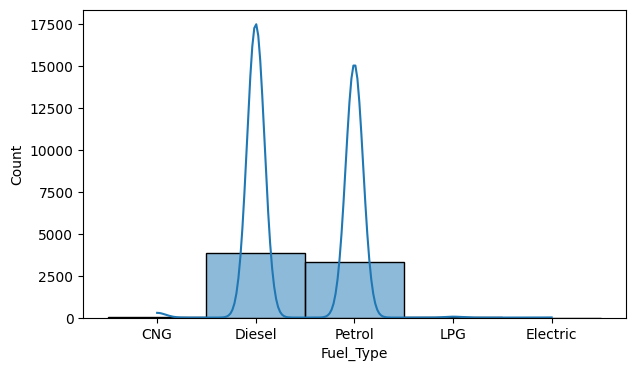

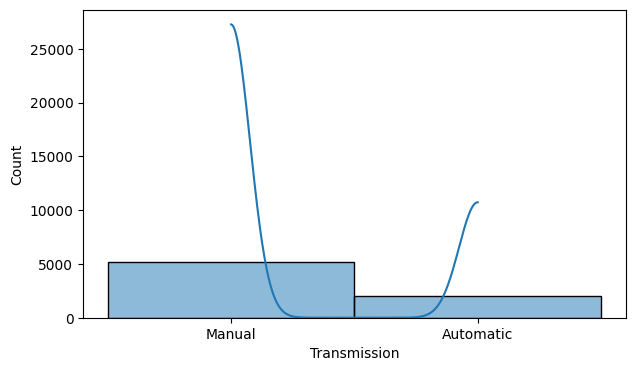

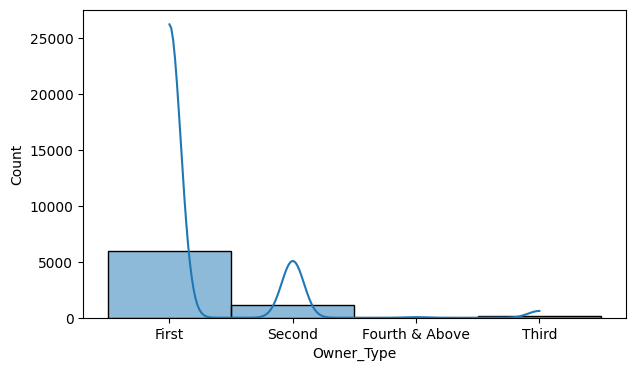

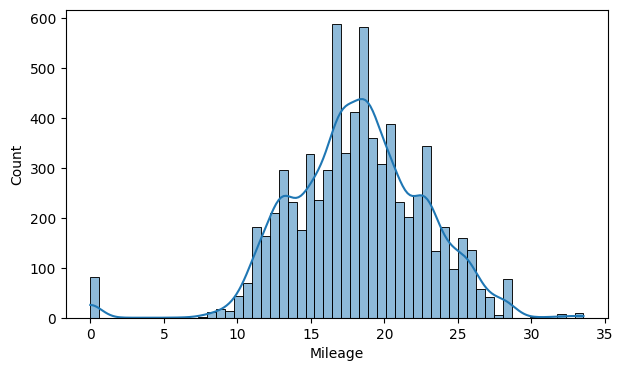

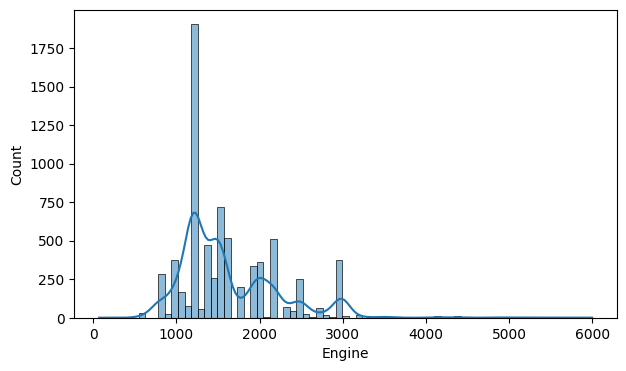

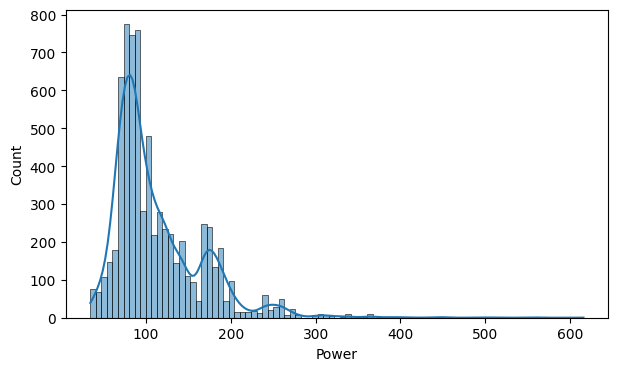

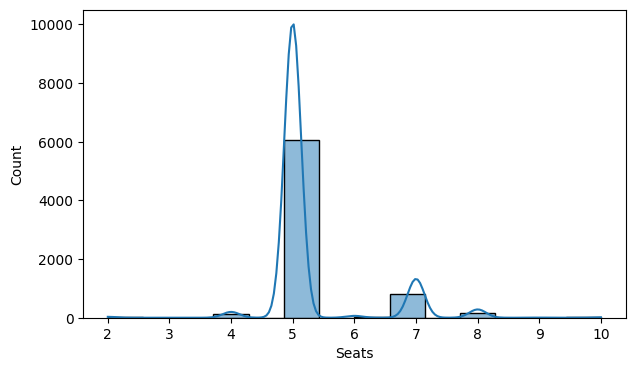

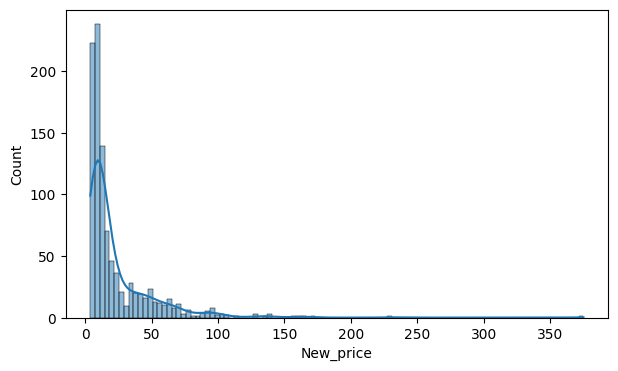

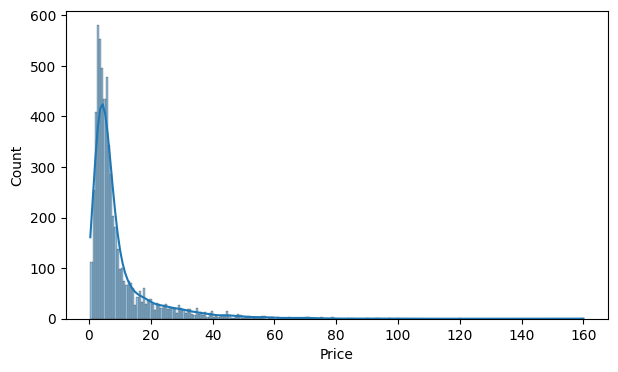

In [20]:
# Plotting all the columns to look at their distributions
for i in df.columns:
    
    plt.figure(figsize = (7, 4))
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

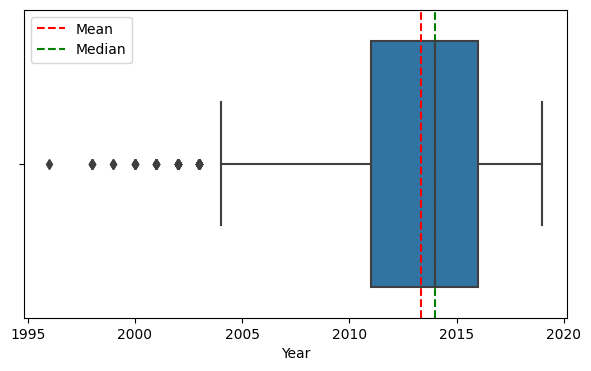

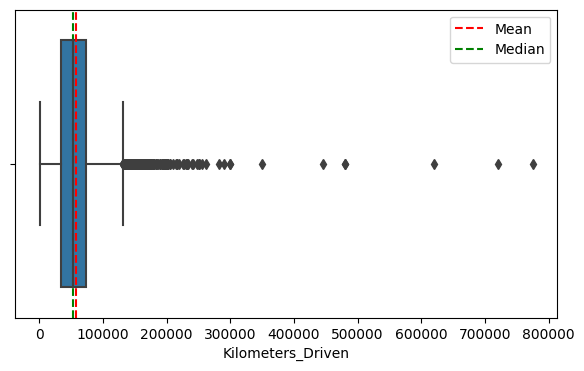

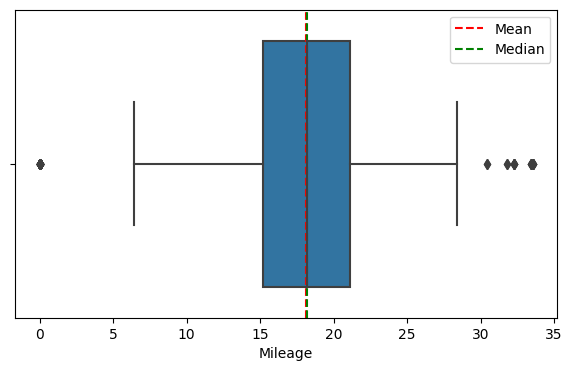

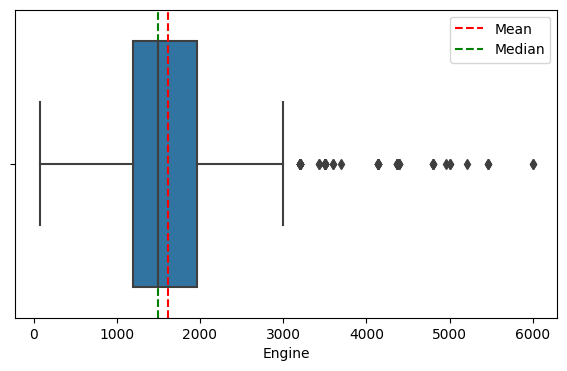

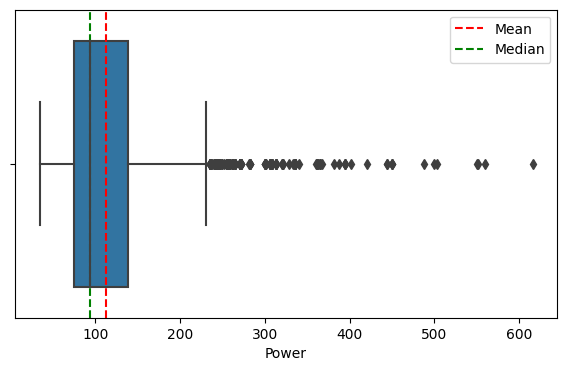

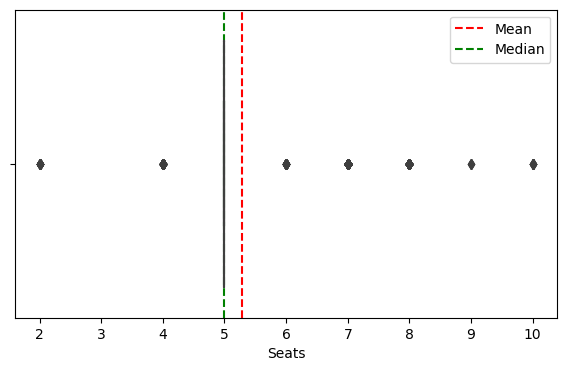

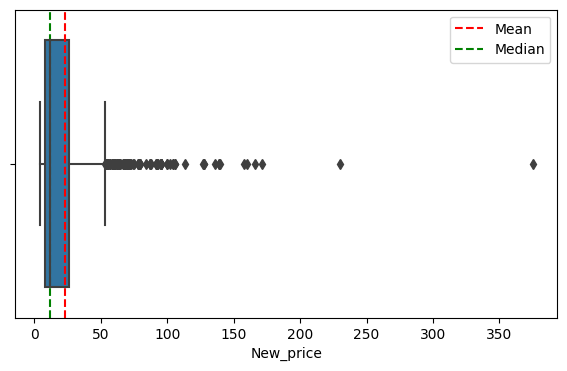

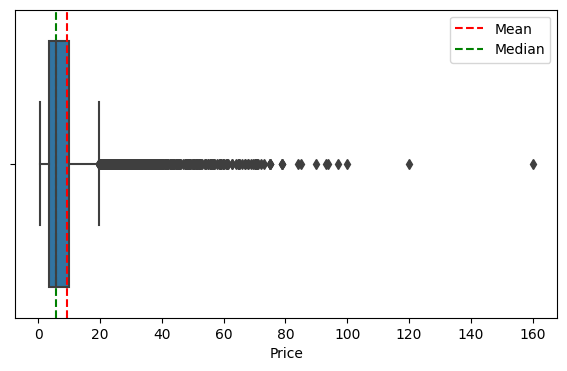

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Plotting all the numeric columns to look at their distributions
for i in numeric_cols.columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=numeric_cols, x=i)
    
    # Calculate mean and median
    mean_val = numeric_cols[i].mean()
    median_val = numeric_cols[i].median()
    
    # Add mean and median lines
    plt.axvline(mean_val, color='r', linestyle='--', label='Mean')
    plt.axvline(median_val, color='g', linestyle='--', label='Median')
    
    plt.legend()  # Add legend
    plt.show()


<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

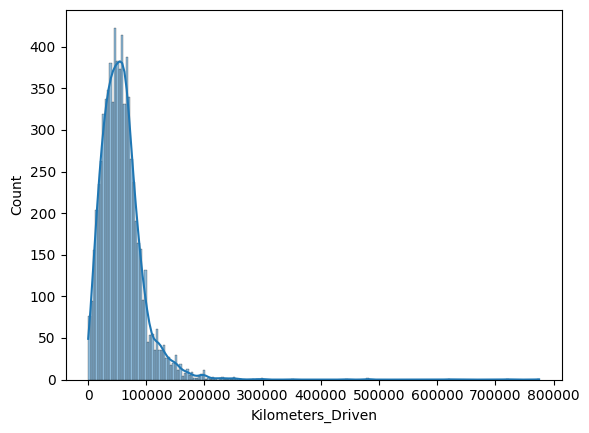

In [22]:
sns.histplot(data = df, x = 'Kilometers_Driven', kde = True)

**Observation**: Kilometers_Driven is highly right-skewed. We will use a Log transformation on Kilometers_Driven to reduce the skew.

In [23]:
import numpy as np # We can add a transformed kilometers_driven feature in data

df['Kilometers_Driven_Log'] = np.log(df['Kilometers_Driven'])


<Axes: xlabel='Kilometers_Driven_Log', ylabel='Count'>

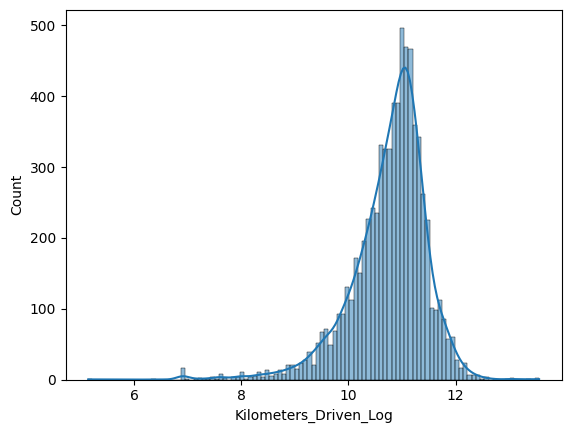

In [24]:
sns.histplot(data = df, x = 'Kilometers_Driven_Log', kde = True)

<Axes: xlabel='Price', ylabel='Count'>

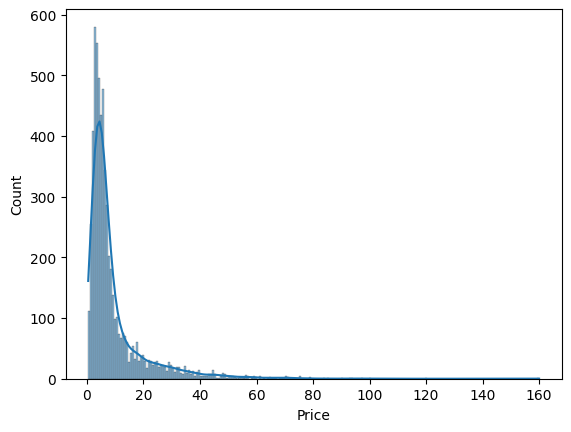

In [25]:
sns.histplot(data = df, x = 'Price', kde = True)

**Observation**: Prce is highly right-skewed. We will use a Log transformation on Price to reduce the skew.

In [26]:
import numpy as np

df['Price_Log'] = np.log(df['Price'])


<Axes: xlabel='Price_Log', ylabel='Count'>

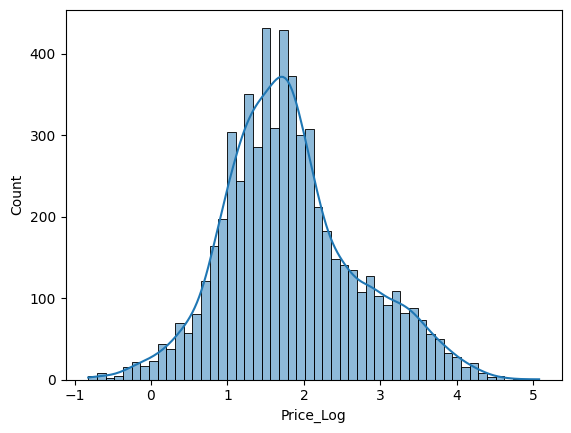

In [27]:
sns.histplot(data = df, x = 'Price_Log', kde = True)

In [28]:
# We can add a transformed Year feature in data
df["Year_Log"] = np.log(df["Year"])

<Axes: xlabel='Year_Log', ylabel='Count'>

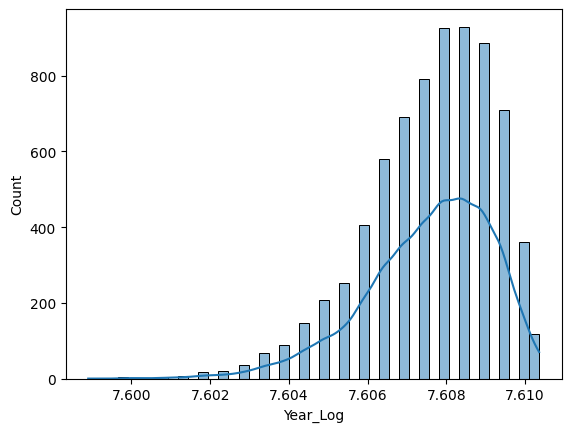

In [29]:
sns.histplot(data = df, x = 'Year_Log', kde = True)

In [30]:
df['Engine_Log'] = np.log(df['Engine']) #Add transformed Engine in data.

<Axes: xlabel='Engine_Log', ylabel='Count'>

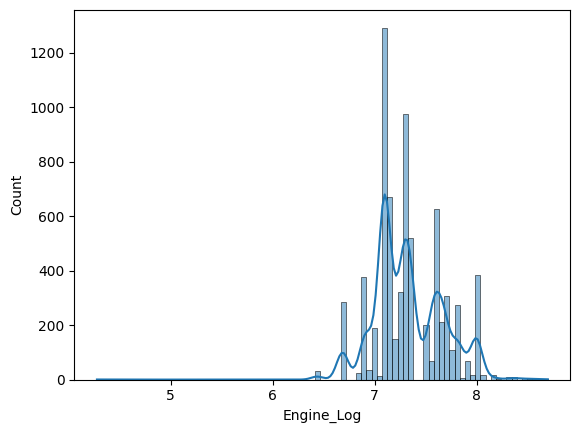

In [31]:
sns.histplot(data = df, x = 'Engine_Log', kde = True)

In [32]:
df['Power_Log'] = np.log(df['Power'])

<Axes: xlabel='Power_Log', ylabel='Count'>

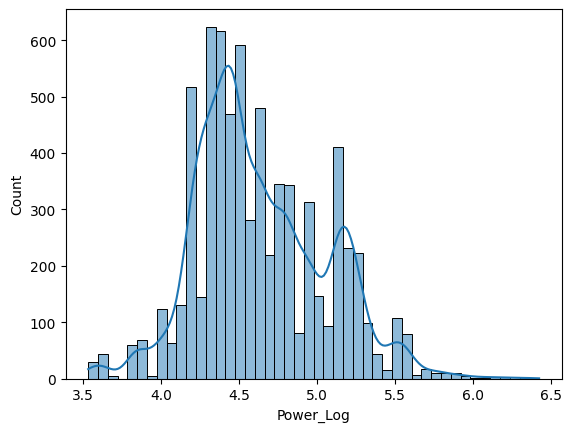

In [33]:
sns.histplot(data = df, x = 'Power_Log', kde = True)

In [34]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Create correlation matrix
corr_matrix = numeric_cols.corr()

plt.show()

In [35]:
def perc_on_bar(z):
    '''
    Plot barplot with percentage for a categorical column
    
    z: name of the categorical column
    '''
    total = len(df[z])  # Length of the column
    
    plt.figure(figsize=(15, 5))
    
    ax = sns.countplot(data=df, x=z, palette='Paired', order=df[z].value_counts().index)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
        y = p.get_y() + p.get_height() + 0.5  # Height of the plot (adjust 0.5 to increase or decrease spacing)
        ax.annotate(percentage, (x, y), size=12)  # Annotate the percentage
    
    plt.show()  # Show the plot


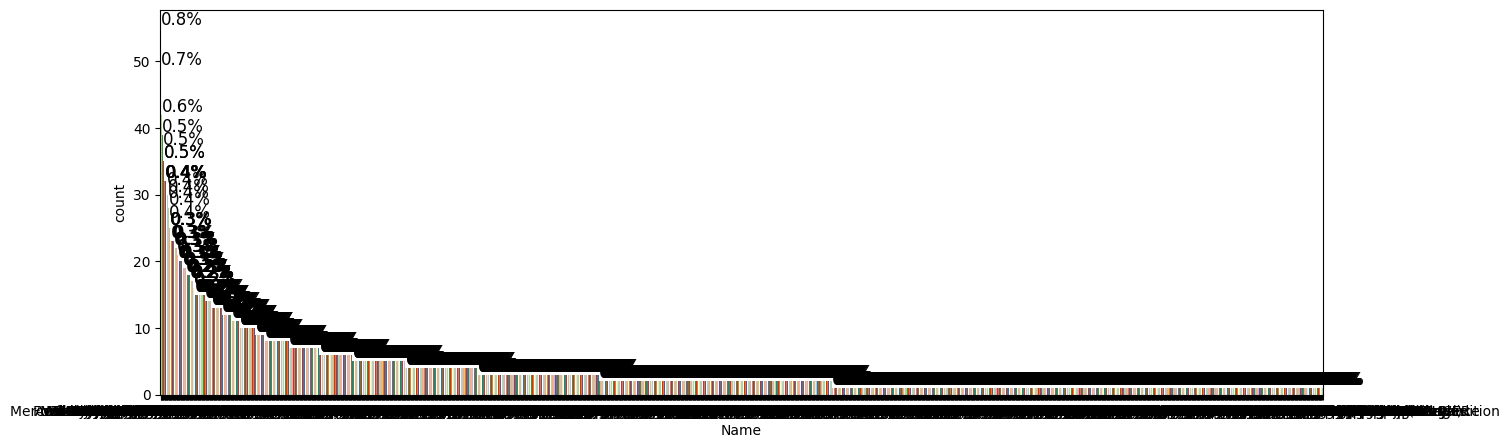

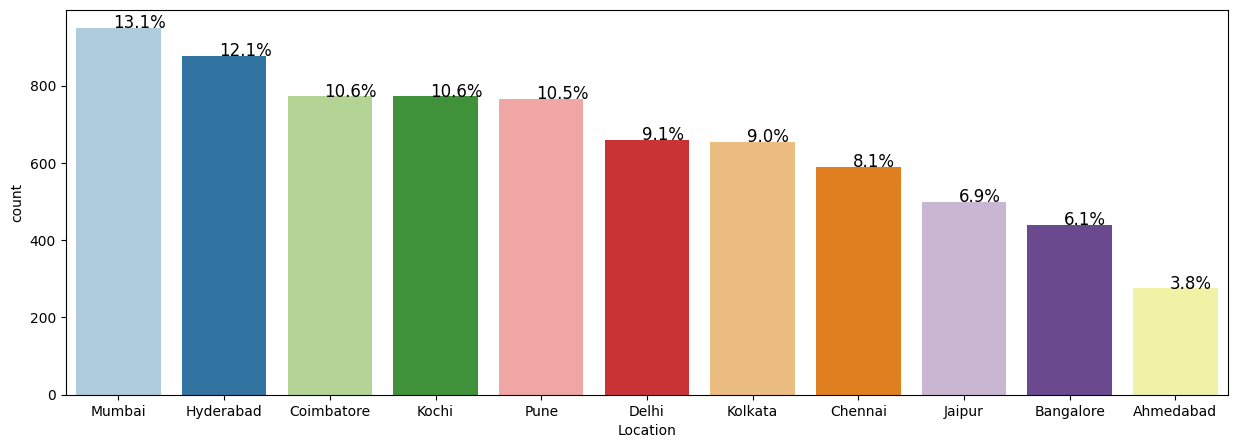

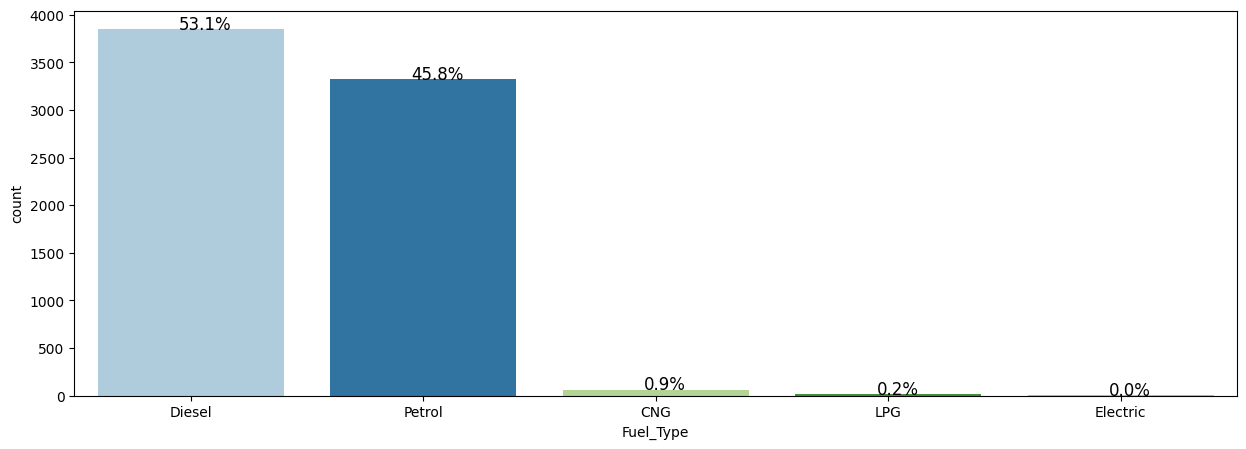

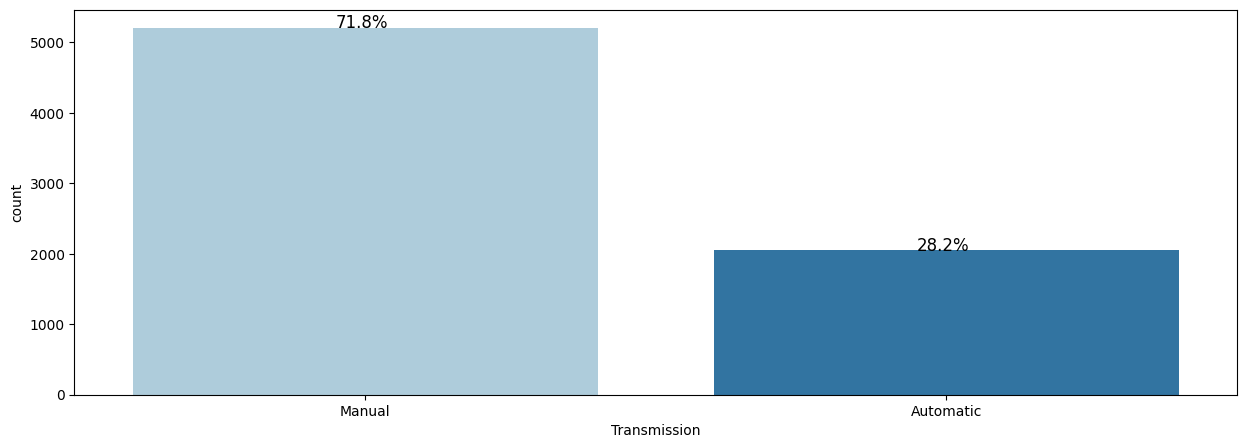

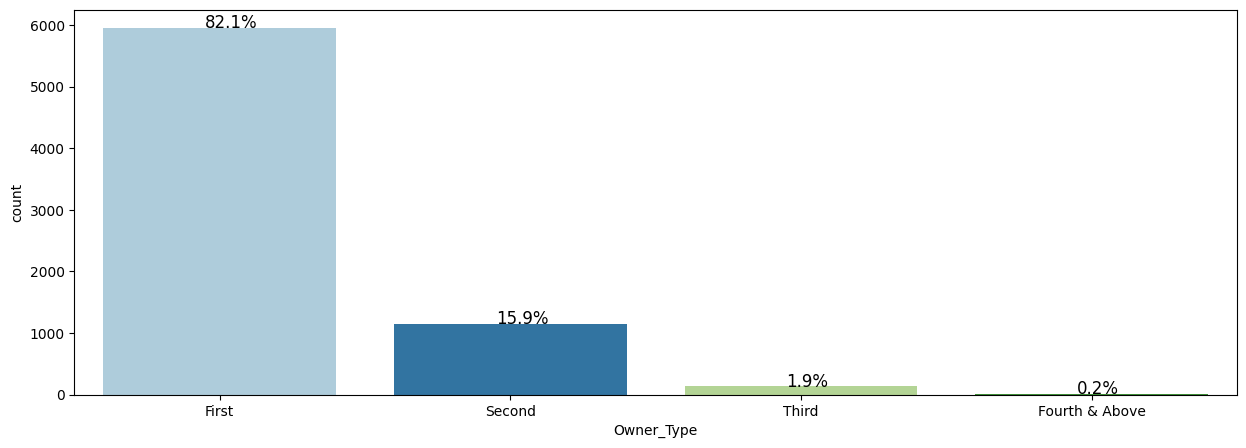

In [36]:
# Get all categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Iterate over each categorical column
for col in categorical_cols:
    perc_on_bar(col)


**Observations:**
- The top 5 locations are Mumnai, Hyderabad, Kochi and Coimbatore.The two main fuel types are Diesel (53.2%) and Petrol(45.6%). The majority of transmissons are manuel (71.4%) vs automatic (28.6%). The majority of the cars are from frist owners (81.9%) vs second owners (16.1%). The top 5 brands are Maruti (20.1%), Hyundai(18.4%), Honda (10.1%), Toyota(6.8%),and Mercedes-benz(5.3%).

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

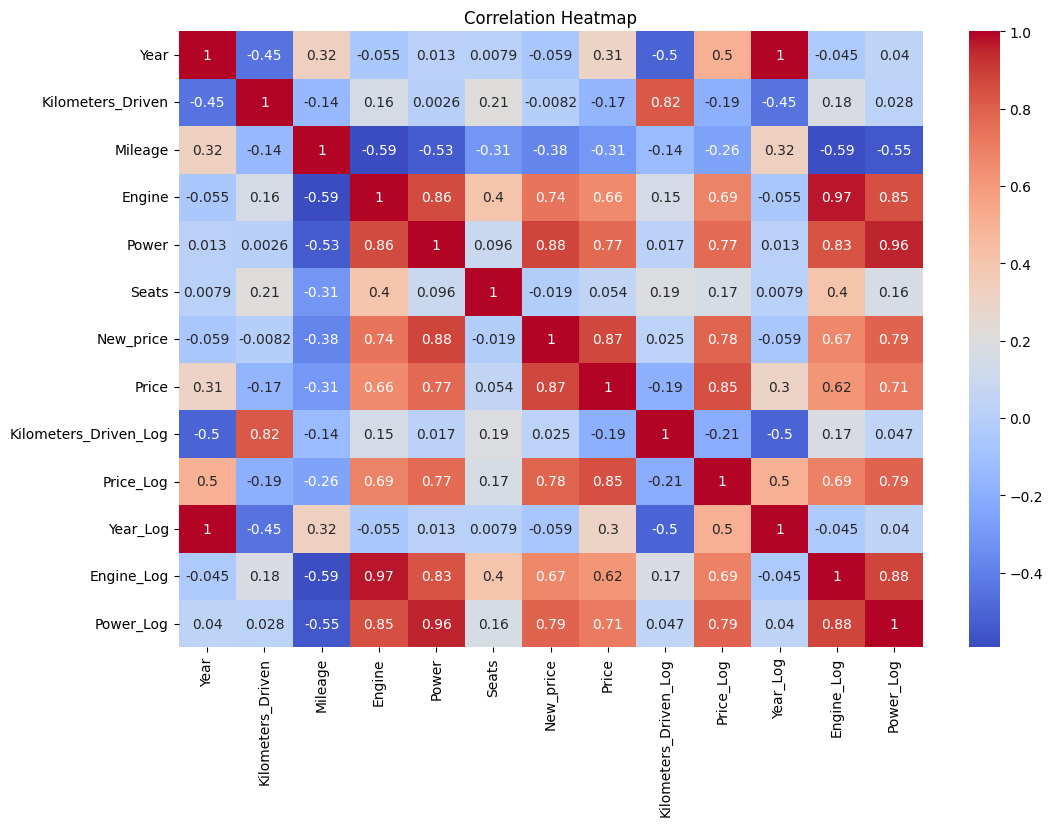

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [38]:
columns_to_drop = ["Power", "Engine", "Year", "Price", "Kilometers_Driven"]
df = df.drop(columns_to_drop, axis=1)


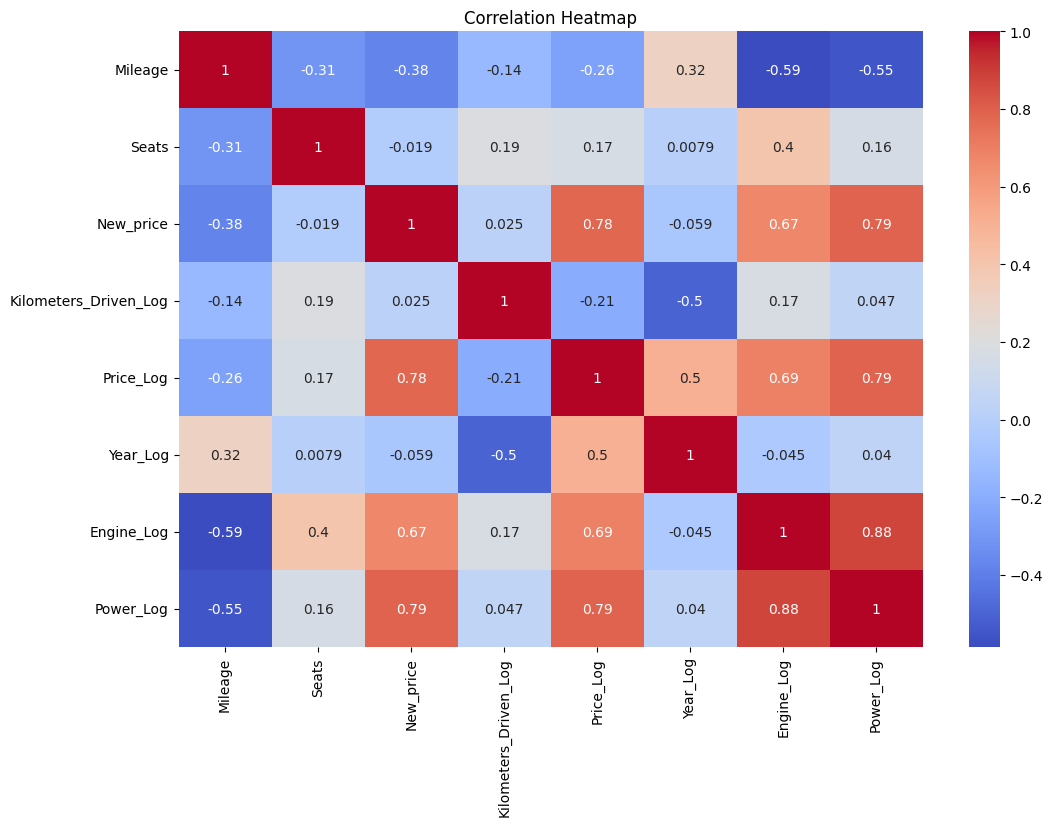

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Observations:**
- We can see that there is a -85% correlation between New_Price and Kilometers_Driven
- We can see that there is a 69% correlation between Price_Log and Engine_Log
- We can see that there is a 78% correlation between Price_Log and Power_Log
- We can see that there is a 88% correlation between Power_Log and Engine_Log

<Axes: xlabel='Price_Log'>

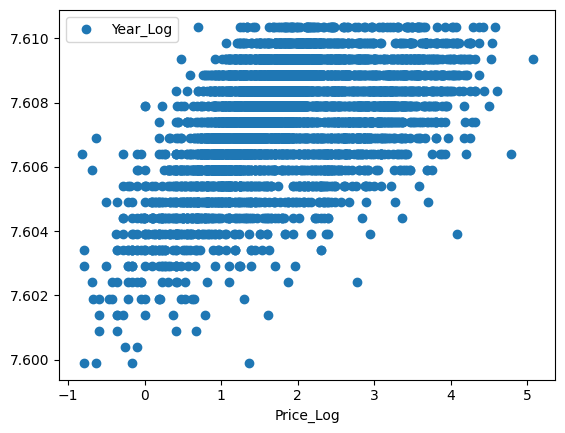

In [40]:
# Let us plot pair plot for the variables 'Year_Log' and 'price_log'
df.plot(x = 'Price_Log', y = 'Year_Log', style = 'o')

**Observations:**
- The Price seems to increase as with the greater year of the car (newer). This suggests new cars sell for more money.

<Axes: xlabel='Price_Log'>

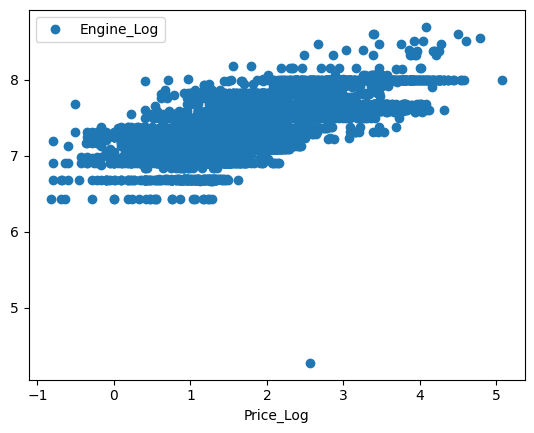

In [41]:
# Let us plot pair plot for the variables 'Engine_Log' and 'Price_log'
df.plot(x = 'Price_Log', y = 'Engine_Log', style = 'o')

**Observations:**
- The price of used cars goes up as the Engine gets larger. This suggests that a vehicle with a larger engine costs more money.

<Axes: xlabel='Price_Log'>

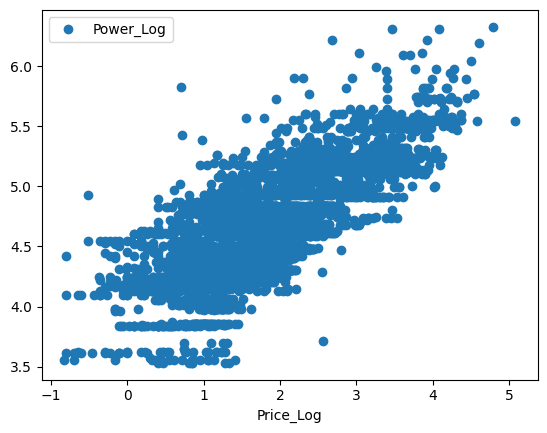

In [42]:
# Let us plot pair plot for the variables 'Power_Log' and 'Price_log'
df.plot(x = 'Price_Log', y = 'Power_Log', style = 'o')

**Observations:**
- The price of used cars goes up as the Power gets larger. This suggests that a vehicle with a larger power costs more money. Generally a car with more power also has a larger Engine.

<Axes: xlabel='Price_Log'>

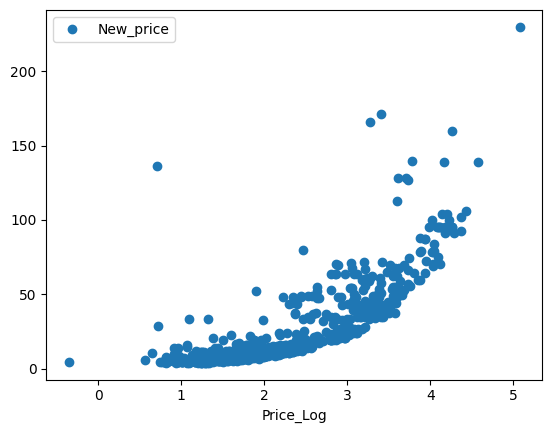

In [43]:
# Let us plot pair plot for the variables 'New_Price' and 'Price_log'
df.plot(x = 'Price_Log', y = 'New_price', style = 'o')

**Observations:**
- The price of used cars goes up as the New_Price gets larger. This suggests that a vehicle that sells for a higher new price, also re-sells for more money as a used car. 

<Axes: xlabel='Power_Log'>

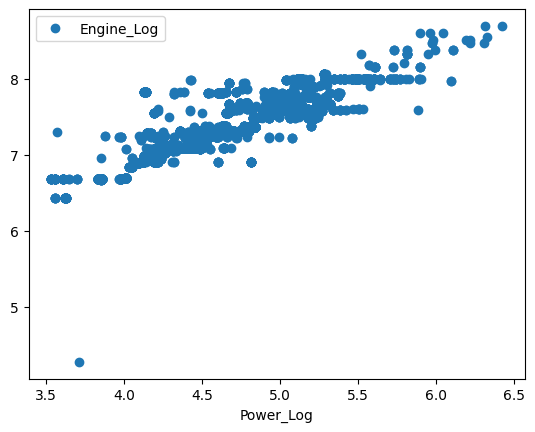

In [44]:
# Let us plot pair plot for the variables 'year' and 'price_log'
df.plot(x = 'Power_Log', y = 'Engine_Log', style = 'o')

**Observations:**
- The price of used cars goes up as the Engine_Log gets larger. This suggests that a vehicle that has a larger engine, sells for a higher price. 

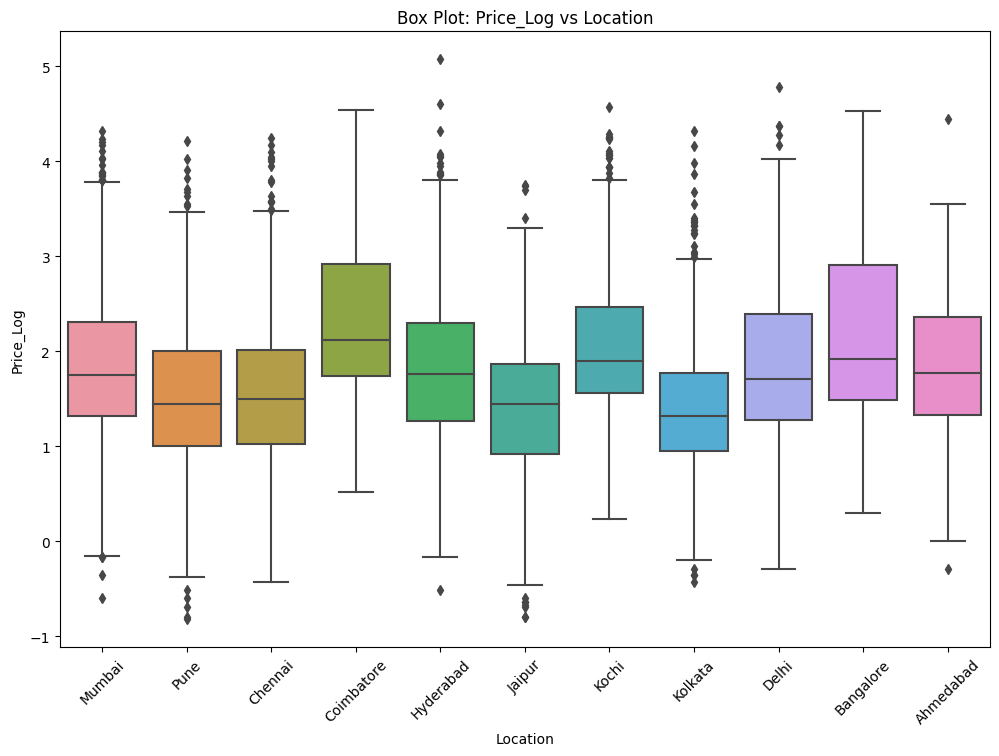

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='Price_Log', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot: Price_Log vs Location')
plt.show()


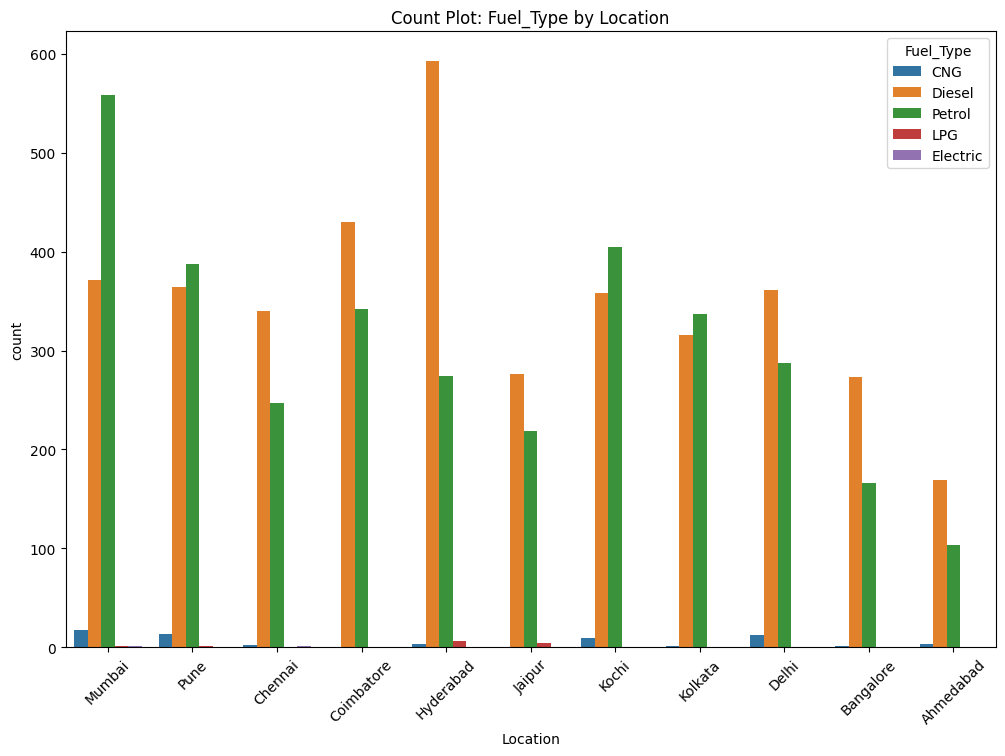

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(x='Location', hue='Fuel_Type', data=df)
plt.xticks(rotation=45)
plt.title('Count Plot: Fuel_Type by Location')
plt.show()


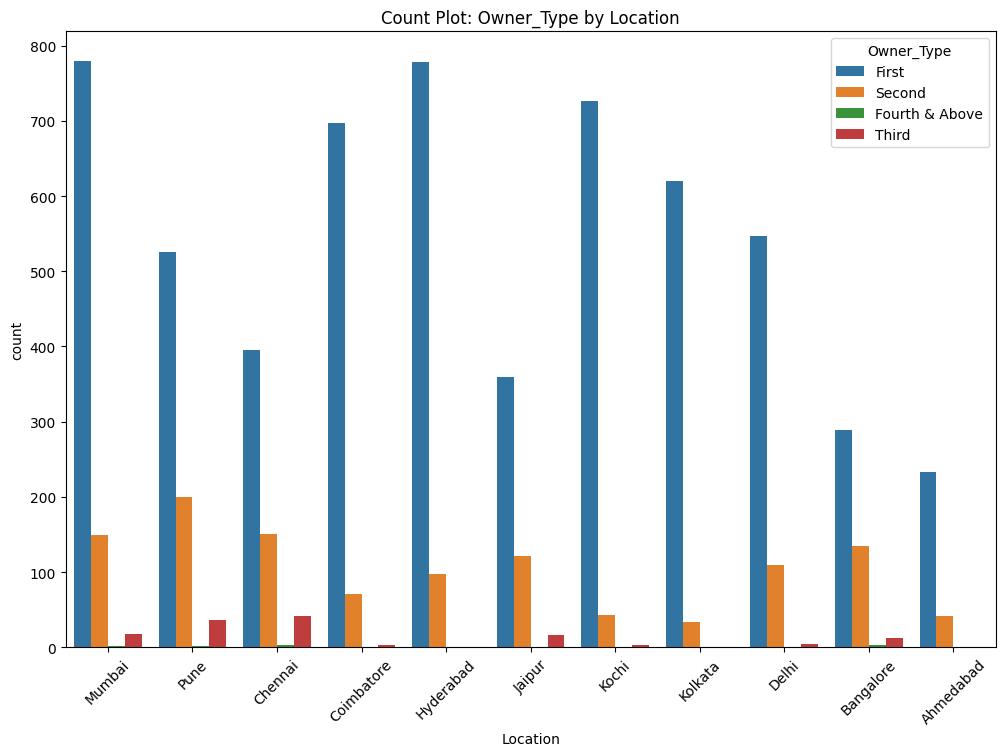

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(x='Location', hue='Owner_Type', data=df)
plt.xticks(rotation=45)
plt.title('Count Plot: Owner_Type by Location')
plt.show()


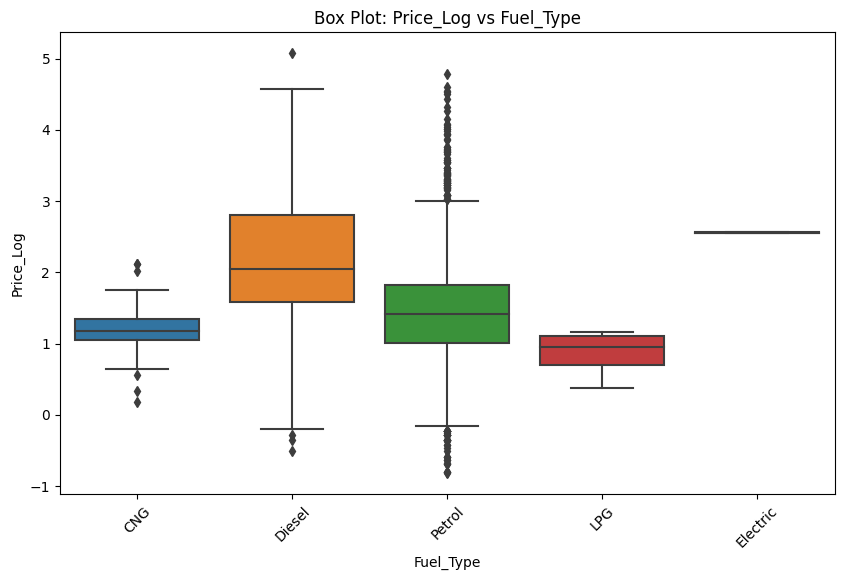

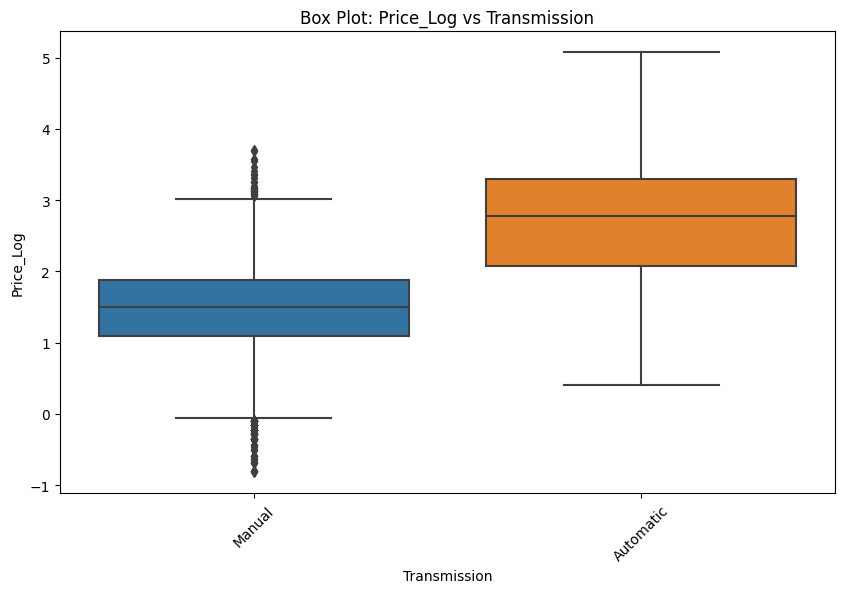

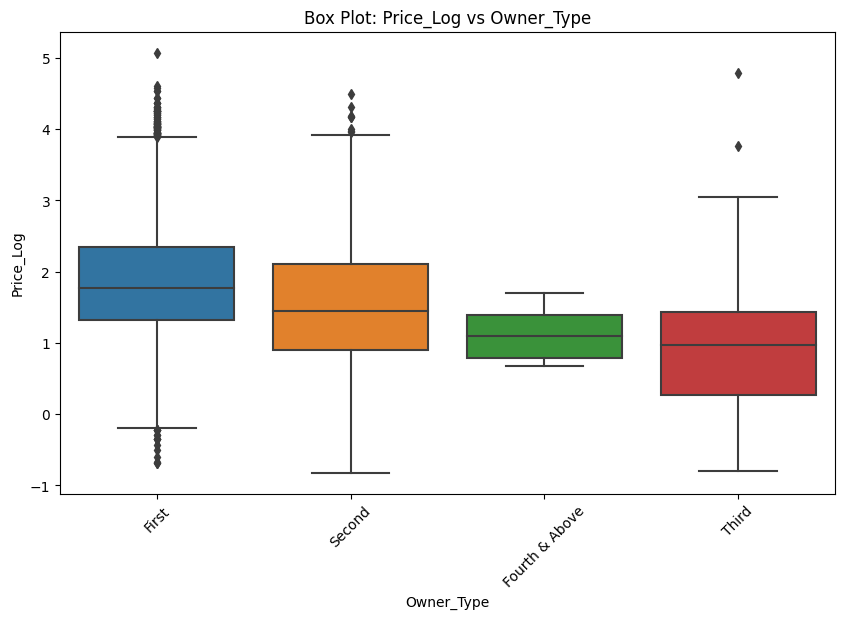

In [48]:
# Box plot for Fuel_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price_Log', data=df)
plt.title('Box Plot: Price_Log vs Fuel_Type')
plt.xticks(rotation=45)
plt.show()

# Box plot for Transmission
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price_Log', data=df)
plt.title('Box Plot: Price_Log vs Transmission')
plt.xticks(rotation=45)
plt.show()

# Box plot for Owner_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Owner_Type', y='Price_Log', data=df)
plt.title('Box Plot: Price_Log vs Owner_Type')
plt.xticks(rotation=45)
plt.show()



**Observations:**
- The median price of used cars is highest at the locations of Coimbatore, Mumbai, Bangalore and Kochi.
- The Price of used cars is highest for Diesel engines, followed by Petrol.
- Automatic transmissions cost more than manual.
- First and second owner_type cost more than third and fourth.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

In [49]:
df["Name"].value_counts()

Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Tata Manza Aura Plus Quadrajet BS IV     1
Tata Indigo eCS LS (TDI) BS-III          1
Hyundai Grand i10 Era                    1
Ford Figo Diesel                         1
Hyundai Elite i20 Magna Plus             1
Name: count, Length: 2041, dtype: int64

In [50]:
unique_count = df["Name"].nunique()
print(unique_count)


2041


- With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [51]:
# Extract Brand Names
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())

In [52]:
model_names = df["Brand"].unique() #Extract Model Names
print(model_names)


['maruti' 'hyundai' 'honda' 'audi' 'nissan' 'toyota' 'volkswagen' 'tata'
 'land' 'mitsubishi' 'renault' 'mercedes-benz' 'bmw' 'mahindra' 'ford'
 'porsche' 'datsun' 'jaguar' 'volvo' 'chevrolet' 'skoda' 'mini' 'fiat'
 'jeep' 'smart' 'ambassador' 'isuzu' 'force' 'bentley' 'lamborghini'
 'hindustan' 'opelcorsa']


In [53]:
unique_count = df["Brand"].nunique()
print(unique_count)

32


**Observations:**
- There are 32 unique model names.

### **Missing value treatment**

In [54]:
missing_values = df.isnull().sum() #Missing values of each column.
print(missing_values)


Name                        0
Location                    0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Seats                      53
New_price                6246
Kilometers_Driven_Log       0
Price_Log                1234
Year_Log                    0
Engine_Log                 46
Power_Log                 175
Brand                       0
dtype: int64


**Observations:**
- We missing values for Mileage, Seats, New_Price, Price_Log, Engine_Log, and Power_Log

In [55]:
# Iterate over each missing value in the 'Seats' column
for index, row in df[df['Seats'].isnull()].iterrows():
    brand = row['Brand']
    
    # Find the median number of seats for cars with the same brand
    median_seats = df[df['Brand'] == brand]['Seats'].median()
    
    # Impute the missing value with the median number of seats
    df.at[index, 'Seats'] = median_seats



In [56]:
median_seats = df['Seats'].median()
print("Median number of seats:", median_seats)


Median number of seats: 5.0


In [57]:
missing_values = df.isnull().sum()
print(missing_values)


Name                        0
Location                    0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Seats                       0
New_price                6246
Kilometers_Driven_Log       0
Price_Log                1234
Year_Log                    0
Engine_Log                 46
Power_Log                 175
Brand                       0
dtype: int64


In [58]:
median_mileage = df['Mileage'].median()
df['Mileage'].fillna(median_mileage, inplace=True)


In [59]:
missing_values = df.isnull().sum()
print(missing_values)

Name                        0
Location                    0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Seats                       0
New_price                6246
Kilometers_Driven_Log       0
Price_Log                1234
Year_Log                    0
Engine_Log                 46
Power_Log                 175
Brand                       0
dtype: int64


In [60]:
median_mileage = df['Engine_Log'].median()
df['Engine_Log'].fillna(median_mileage, inplace=True)

In [61]:
median_mileage = df['Power_Log'].median()
df['Power_Log'].fillna(median_mileage, inplace=True)

In [62]:
median_mileage = df['New_price'].median()
df['New_price'].fillna(median_mileage, inplace=True)

In [63]:
missing_values = df.isnull().sum()
print(missing_values)

Name                        0
Location                    0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Seats                       0
New_price                   0
Kilometers_Driven_Log       0
Price_Log                1234
Year_Log                    0
Engine_Log                  0
Power_Log                   0
Brand                       0
dtype: int64


In [64]:
df.dropna(subset=['Price_Log'], inplace=True)


In [65]:
missing_values = df.isnull().sum()
print(missing_values)

Name                     0
Location                 0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Seats                    0
New_price                0
Kilometers_Driven_Log    0
Price_Log                0
Year_Log                 0
Engine_Log               0
Power_Log                0
Brand                    0
dtype: int64


## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

- Newer cars(year made) from only one owner that have automatic transmissions, running on diesel, with larger engines will cost the most money.

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [66]:
print(df.columns)

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Seats', 'New_price', 'Kilometers_Driven_Log', 'Price_Log',
       'Year_Log', 'Engine_Log', 'Power_Log', 'Brand'],
      dtype='object')


In [67]:
import numpy as np

df['Price'] = np.exp(df['Price_Log'])


In [68]:
# Step-1
X = df.drop(['Name', 'Price', 'Price_Log', 'Kilometers_Driven_Log'], axis=1)

y = df[['Price_Log', 'Price']]


In [69]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [70]:
# Step-3: Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape, X_test.shape)


(4212, 53) (1806, 53)


In [71]:
# Calculate the correlation matrix for X_train
corr_matrix = X_train.corr()

# Set the diagonal elements to NaN to exclude them
np.fill_diagonal(corr_matrix.values, np.nan)

# Find the highest pairwise correlations
highest_correlations = corr_matrix.unstack().sort_values(ascending=False)

# Print the top N highest correlations
top_n = 20  # Specify the number of top correlations to print
for i in range(top_n):
    variables = highest_correlations.index[i]
    correlation = highest_correlations[i]
    print(f"Pair: {variables}, Correlation: {correlation:.2f}")


Pair: ('Power_Log', 'Engine_Log'), Correlation: 0.88
Pair: ('Engine_Log', 'Power_Log'), Correlation: 0.88
Pair: ('Engine_Log', 'Fuel_Type_Diesel'), Correlation: 0.48
Pair: ('Fuel_Type_Diesel', 'Engine_Log'), Correlation: 0.48
Pair: ('Brand_mahindra', 'Seats'), Correlation: 0.48
Pair: ('Seats', 'Brand_mahindra'), Correlation: 0.48
Pair: ('Seats', 'Brand_toyota'), Correlation: 0.40
Pair: ('Brand_toyota', 'Seats'), Correlation: 0.40
Pair: ('Engine_Log', 'Seats'), Correlation: 0.40
Pair: ('Seats', 'Engine_Log'), Correlation: 0.40
Pair: ('Brand_maruti', 'Mileage'), Correlation: 0.37
Pair: ('Mileage', 'Brand_maruti'), Correlation: 0.37
Pair: ('Brand_bmw', 'Power_Log'), Correlation: 0.35
Pair: ('Power_Log', 'Brand_bmw'), Correlation: 0.35
Pair: ('Brand_mercedes-benz', 'Power_Log'), Correlation: 0.34
Pair: ('Power_Log', 'Brand_mercedes-benz'), Correlation: 0.34
Pair: ('Power_Log', 'Fuel_Type_Diesel'), Correlation: 0.34
Pair: ('Fuel_Type_Diesel', 'Power_Log'), Correlation: 0.34
Pair: ('Year_Log

In [72]:
import pandas as pd

# Assuming df is your DataFrame
columns = df.columns

# Print the columns
print(columns)

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Seats', 'New_price', 'Kilometers_Driven_Log', 'Price_Log',
       'Year_Log', 'Engine_Log', 'Power_Log', 'Brand', 'Price'],
      dtype='object')


In [73]:
missing_values = X_train.isnull().sum()
print(missing_values)


Mileage                      0
Seats                        0
New_price                    0
Year_Log                     0
Engine_Log                   0
Power_Log                    0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Brand_audi                   0
Brand_bentley                0
Brand_bmw                    0
Brand_chevrolet              0
Brand_datsun                 0
Brand_fiat                   0
Brand_force                  0
Brand_ford                   0
Brand_ho

In [74]:
print(X_train.columns)


Index(['Mileage', 'Seats', 'New_price', 'Year_Log', 'Engine_Log', 'Power_Log',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Brand_audi', 'Brand_bentley', 'Brand_bmw', 'Brand_chevrolet',
       'Brand_datsun', 'Brand_fiat', 'Brand_force', 'Brand_ford',
       'Brand_honda', 'Brand_hyundai', 'Brand_isuzu', 'Brand_jaguar',
       'Brand_jeep', 'Brand_lamborghini', 'Brand_land', 'Brand_mahindra',
       'Brand_maruti', 'Brand_mercedes-benz', 'Brand_mini', 'Brand_mitsubishi',
       'Brand_nissan', 'Brand_porsche', 'Brand_renault', 'Brand_skoda',
       'Brand_smart', 'Brand_tata', 'Brand_toyota', 'Brand_volkswagen',
     

In [75]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over each non-integer column in X_train
for column in X_train.select_dtypes(exclude='number'):
    # Encode the column to numerical values
    X_train[column] = le.fit_transform(X_train[column])


### **Check for Multicollinearity**

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

                      feature          VIF
0                     Mileage    49.229832
1                       Seats   101.379533
2                   New_price     3.119414
3                    Year_Log  7677.751816
4                  Engine_Log  5294.404344
5                   Power_Log  1115.159035
6          Location_Bangalore     2.511762
7            Location_Chennai     3.050813
8         Location_Coimbatore     3.806271
9              Location_Delhi     3.324795
10         Location_Hyderabad     4.223629
11            Location_Jaipur     2.759896
12             Location_Kochi     3.786270
13           Location_Kolkata     3.294213
14            Location_Mumbai     4.480134
15              Location_Pune     3.624706
16           Fuel_Type_Diesel    62.141125
17         Fuel_Type_Electric     1.036243
18              Fuel_Type_LPG     1.205479
19           Fuel_Type_Petrol    55.939104
20        Transmission_Manual     7.794338
21  Owner_Type_Fourth & Above     1.011384
22         

In [77]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [78]:
print(df.columns)

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Seats', 'New_price', 'Kilometers_Driven_Log', 'Price_Log',
       'Year_Log', 'Engine_Log', 'Power_Log', 'Brand', 'Price'],
      dtype='object')


In [79]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [80]:
# Create a linear regression model
lr = LinearRegression()

In [81]:
# Fit linear regression model
lr.fit(X_train, y_train['Price_Log'])

LinearRegression()

In [82]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Get the feature names used during training
feature_names = X_train.columns

# Select only the matching features in X_test
X_test_selected = X_test[feature_names]

# Predict on the selected test features
y_pred = lr.predict(X_test_selected)

# Calculate evaluation metrics
r2 = r2_score(y_test['Price_Log'], y_pred)
mae = mean_absolute_error(y_test['Price_Log'], y_pred)
rmse = mean_squared_error(y_test['Price_Log'], y_pred, squared=False)
mape = np.mean(np.abs((y_test['Price_Log'] - y_pred) / y_test['Price_Log'])) * 100

# Print the evaluation metrics
print("R^2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


R^2 Score: 0.9364696012184104
MAE: 0.1684719162180074
RMSE: 0.2215119080324911
MAPE: inf


In [83]:
# Get the coefficients of the linear regression model
coefficients = lr.coef_

# Create a DataFrame with the coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the coefficients by absolute value in descending order
coefficients_df['Absolute Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the DataFrame
print(coefficients_df)

                      Feature  Coefficient  Absolute Coefficient
3                    Year_Log   250.604260            250.604260
37          Brand_lamborghini     1.403401              1.403401
17         Fuel_Type_Electric     1.053371              1.053371
49                 Brand_tata    -1.021217              1.021217
28               Brand_datsun    -0.917130              0.917130
25              Brand_bentley     0.899615              0.899615
29                 Brand_fiat    -0.886982              0.886982
27            Brand_chevrolet    -0.876428              0.876428
34                Brand_isuzu    -0.792855              0.792855
39             Brand_mahindra    -0.740279              0.740279
5                   Power_Log     0.652043              0.652043
31                 Brand_ford    -0.646438              0.646438
44               Brand_nissan    -0.642685              0.642685
51           Brand_volkswagen    -0.626439              0.626439
46              Brand_ren

**Observations:**
- We see that the R-squared value is 93%.  So the proportion of variance in the dependent variable (Price) that is explained by the independent variables is equal to 93%. 
- The Year, Brand and Fuel type (Electic) are the most important features. 

In [84]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Convert y_train to a NumPy array
y_train_array = np.array(y_train['Price_Log'])

# Convert X_train to a NumPy array with compatible data types
X_train_array = X_train.astype(np.float64).values

# Train the model
olsmodel1 = sm.OLS(y_train_array, X_train_array)

# Set the variable names
olsmodel1.exog_names[:] = X_train.columns.tolist()

# Fit the model
resultsolsmodel1 = olsmodel1.fit()

# Get the model summary
summary = resultsolsmodel1.summary()
print(summary)

# Retrieve coefficient values and p-values
coef_values = resultsolsmodel1.params
p_values = resultsolsmodel1.pvalues

# Create a DataFrame to store coefficient values and p-values
olsmod = pd.DataFrame({'coef': coef_values, 'pval': p_values})
print(olsmod)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              2023.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):                        0.00
Time:                        13:09:39   Log-Likelihood:                         -2000.8
No. Observations:                4212   AIC:                                      4108.
Df Residuals:                    4159   BIC:                                      4444.
Df Model:                          53                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [85]:
# Get the model summary
summary = resultsolsmodel1.summary()

# Extract p-values from the summary table
table_data = summary.tables[1].data[1:]
p_values = [float(row[4]) for row in table_data]

# Retrieve the variable names with p-values less than or equal to 0.05
sig_var = [var for var, pval in zip(X_train.columns, p_values) if pval <= 0.05]

start = '\033[1m'
end = '\033[95m'
print(start + 'Most overall significant categorical variables of LINEAR REGRESSION are' + end + ':\n', sig_var)


Most overall significant categorical variables of LINEAR REGRESSION are:
 ['Mileage', 'Seats', 'New_price', 'Year_Log', 'Power_Log', 'Location_Bangalore', 'Location_Coimbatore', 'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata', 'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third', 'Brand_chevrolet', 'Brand_datsun', 'Brand_fiat', 'Brand_ford', 'Brand_honda', 'Brand_hyundai', 'Brand_lamborghini', 'Brand_mahindra', 'Brand_maruti', 'Brand_nissan', 'Brand_skoda', 'Brand_tata']


In the simple OLS model there is a lot of Multicollinearity. For example if a car has a large Engine, it has a lot of power. These cars are luxary models that have a high cost. There are only a few cars that are in the third and fourth owner category. Those cars are also high end brands that cost a lot of money and have a small sample size.

**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

In [86]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [87]:
ridge_model = Ridge() #creating Ridge Regression model
ridge_model.fit(X_train, y_train) # Fitting the data into the model

Ridge()

In [88]:
def get_model_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    
    return train_mae, test_mae, train_rmse, test_rmse, train_mape, test_mape, train_r2, test_r2

ridge_model = Ridge()
ridge_scores = get_model_scores(ridge_model, X_train[feature_names], y_train, X_test[feature_names], y_test)

print("Ridge Regression Train MAE:", ridge_scores[0])
print("Ridge Regression Test MAE:", ridge_scores[1])
print("Ridge Regression Train RMSE:", ridge_scores[2])
print("Ridge Regression Test RMSE:", ridge_scores[3])
print("Ridge Regression Train MAPE:", ridge_scores[4])
print("Ridge Regression Test MAPE:", ridge_scores[5])
print("Ridge Regression Train R^2:", ridge_scores[6])
print("Ridge Regression Test R^2:", ridge_scores[7])


Ridge Regression Train MAE: 1.8186031839469319
Ridge Regression Test MAE: 1.7646895784428362
Ridge Regression Train RMSE: 4.231421378866431
Ridge Regression Test RMSE: 3.8981508652729513
Ridge Regression Train MAPE: inf
Ridge Regression Test MAPE: inf
Ridge Regression Train R^2: 0.7582177891143932
Ridge Regression Test R^2: 0.7869447317501028


In [89]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold# For tuning the model
from sklearn.model_selection import GridSearchCV


In [90]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [91]:
model_cv.best_params_

{'alpha': 0.001}

In [92]:
lasso_model_tuned = Lasso(alpha=0.001)
lasso_model_tuned.fit(X_train, y_train)

Lasso(alpha=0.001)

In [93]:
# Function to calculate model scores
def get_model_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    
    return train_mae, test_mae, train_rmse, test_rmse, train_mape, test_mape, train_r2, test_r2

# Select only the matching features in X_train
X_train_selected = X_train[feature_names]

# Select only the matching features in X_test
X_test_selected = X_test[feature_names]

# Calculating the model scores for Lasso
lasso_scores = get_model_scores(lasso_model_tuned, X_train_selected, y_train, X_test_selected, y_test)

print("Lasso Regression Train MAE:", lasso_scores[0])
print("Lasso Regression Test MAE:", lasso_scores[1])
print("Lasso Regression Train RMSE:", lasso_scores[2])
print("Lasso Regression Test RMSE:", lasso_scores[3])
print("Lasso Regression Train MAPE:", lasso_scores[4])
print("Lasso Regression Test MAPE:", lasso_scores[5])
print("Lasso Regression Train R^2:", lasso_scores[6])
print("Lasso Regression Test R^2:", lasso_scores[7])


Lasso Regression Train MAE: 1.5867687670062958
Lasso Regression Test MAE: 1.5265699872787688
Lasso Regression Train RMSE: 3.847063315910756
Lasso Regression Test RMSE: 3.5486403476575195
Lasso Regression Train MAPE: inf
Lasso Regression Test MAPE: inf
Lasso Regression Train R^2: 0.7792772256247433
Lasso Regression Test R^2: 0.8042373232757459


**Observation:**

- After applying the Grid SearchCV, the optimized value of alpha results will be 0.001.
- The performance metrics are showing slightly improved results as compared to the Ridge Regression.

**Decision Tree**

In [94]:
from sklearn.tree import DecisionTreeRegressor


In [95]:
dtree = DecisionTreeRegressor(random_state=1)


In [96]:
dtree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=1)

In [97]:
# Function to calculate model scores
def get_model_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)

    return train_mae, test_mae, train_rmse, test_rmse, train_r2, test_r2

# Train the dtree model
dtree.fit(X_train_selected, y_train)

# Get the model scores for dtree
dtree_scores = get_model_scores(dtree, X_train_selected, y_train, X_test_selected, y_test)

print("Decision Tree Regression Train MAE:", dtree_scores[0])
print("Decision Tree Regression Test MAE:", dtree_scores[1])
print("Decision Tree Regression Train RMSE:", dtree_scores[2])
print("Decision Tree Regression Test RMSE:", dtree_scores[3])
print("Decision Tree Regression Train R^2:", dtree_scores[4])
print("Decision Tree Regression Test R^2:", dtree_scores[5])


Decision Tree Regression Train MAE: 0.04286974523195683
Decision Tree Regression Test MAE: 1.0647409457029344
Decision Tree Regression Train RMSE: 0.2345081239046563
Decision Tree Regression Test RMSE: 3.3127958497944303
Decision Tree Regression Train R^2: 0.9989517335505711
Decision Tree Regression Test R^2: 0.8605201807163925


In [98]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power_Log                  0.664545
Year_Log                   0.170875
Engine_Log                 0.039609
New_price                  0.035484
Mileage                    0.018876
Transmission_Manual        0.011457
Brand_land                 0.007573
Seats                      0.006329
Owner_Type_Second          0.005369
Brand_audi                 0.003956
Brand_mini                 0.003828
Location_Coimbatore        0.003641
Location_Hyderabad         0.002917
Location_Bangalore         0.002116
Brand_porsche              0.002035
Location_Kochi             0.001728
Fuel_Type_Diesel           0.001663
Location_Delhi             0.001650
Brand_mercedes-benz        0.001614
Fuel_Type_Petrol           0.001592
Brand_bmw                  0.001574
Location_Pune              0.001226
Brand_mahindra             0.001211
Brand_honda                0.001210
Brand_jaguar               0.000957
Location_Mumbai            0.000933
Brand_skoda                0

**Observation:**

- After applying the Decision Tree, the model doesn't show any improement over the Linear Regression.
- The most important features are the Power, Year and Engine.

### **Hyperparameter Tuning: Random Forest**

In [99]:
from sklearn.ensemble import RandomForestRegressor


In [100]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest regression model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [101]:
# Function to calculate model scores
def get_model_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)

    return train_mae, test_mae, train_rmse, test_rmse, train_r2, test_r2

# Train the random forest model
rf_model.fit(X_train_selected, y_train)

# Get the model scores for random forest
rf_scores = get_model_scores(rf_model, X_train_selected, y_train, X_test_selected, y_test)

print("Random Forest Regression Train MAE:", rf_scores[0])
print("Random Forest Regression Test MAE:", rf_scores[1])
print("Random Forest Regression Train RMSE:", rf_scores[2])
print("Random Forest Regression Test RMSE:", rf_scores[3])
print("Random Forest Regression Train R^2:", rf_scores[4])
print("Random Forest Regression Test R^2:", rf_scores[5])


Random Forest Regression Train MAE: 0.3133321905897034
Random Forest Regression Test MAE: 0.8235388093041314
Random Forest Regression Train RMSE: 0.9890667342410052
Random Forest Regression Test RMSE: 2.7417227151775485
Random Forest Regression Train R^2: 0.9873392402779132
Random Forest Regression Test R^2: 0.9107805416855073


In [102]:
print(pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Power_Log                  6.683720e-01
Year_Log                   1.665392e-01
Engine_Log                 4.038581e-02
New_price                  2.174917e-02
Mileage                    1.940370e-02
Brand_land                 1.033818e-02
Seats                      7.917272e-03
Transmission_Manual        7.865375e-03
Brand_mercedes-benz        5.511494e-03
Brand_lamborghini          4.648189e-03
Brand_audi                 3.673359e-03
Brand_porsche              3.400846e-03
Location_Bangalore         3.364939e-03
Location_Hyderabad         2.907162e-03
Brand_mini                 2.767690e-03
Location_Coimbatore        2.549594e-03
Brand_bmw                  2.356241e-03
Location_Delhi             2.283254e-03
Location_Mumbai            2.067118e-03
Fuel_Type_Petrol           2.025332e-03
Owner_Type_Second          1.999424e-03
Location_Kochi             1.915559e-03
Fuel_Type_Diesel           1.833982e-03
Location_Kolkata           1.397318e-03


**Observation:**

- After applying the Random Forest, the model does show improement over the Linear Regression, Ridge and Decision Tree.
- This is the highest R-Squared value, of .90.9 or 90.9%.

**Feature Importance**
- Power, Year and Engine are again the most important features.

### **Hyperparameter Tuning: Decision Tree**

In [103]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Choose the type of estimator
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'

# Run the grid search
grid_obj = GridSearchCV(estimator=dtree_tuned, param_grid=parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_features='auto', min_samples_split=10, random_state=1)

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test data
y_pred = dtree_tuned.predict(X_test_selected)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R^2
r2 = r2_score(y_test, y_pred)

print("MAE: {:.2f}".format(mae))
print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("R^2: {:.2f}".format(r2))


MAE: 1.06
MSE: 10.65
RMSE: 3.26
R^2: 0.87


In [105]:
# feature importances
importances = dtree_tuned.feature_importances_

# Get the indices of the features sorted by importance
sorted_indices = np.argsort(importances)[::-1]

# Print the feature names and their importance scores
for i in sorted_indices:
    print(f"Feature: {X_train.columns[i]}, Importance: {importances[i]}")

Feature: Power_Log, Importance: 0.6647605502603086
Feature: Year_Log, Importance: 0.17068866714805522
Feature: Engine_Log, Importance: 0.039095297459926924
Feature: New_price, Importance: 0.03543517629474762
Feature: Brand_lamborghini, Importance: 0.014956333820667163
Feature: Mileage, Importance: 0.013386492909493295
Feature: Transmission_Manual, Importance: 0.011611437917859508
Feature: Seats, Importance: 0.009476824400814356
Feature: Brand_land, Importance: 0.0077783131395151766
Feature: Brand_mini, Importance: 0.003933172891942183
Feature: Owner_Type_Second, Importance: 0.0037841436552218757
Feature: Brand_bentley, Importance: 0.0021668151864196886
Feature: Location_Hyderabad, Importance: 0.0021343254874260577
Feature: Brand_audi, Importance: 0.0018292213878247205
Feature: Location_Bangalore, Importance: 0.0017228292937263331
Feature: Location_Coimbatore, Importance: 0.0015646479953818706
Feature: Brand_porsche, Importance: 0.0014513324516728342
Feature: Fuel_Type_Petrol, Importanc

**Observation:**

- After applying the Hyper Tuning on the Decision Tree, the model does show improvment over the original Decision Tree.


## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**Observations:** The Linear Regression and OLS model suffer from Multicollinearity. Because high end cars cost more money, are more likely to go through more owners, have larger Engines which then have more power and cost more money, it makes it hard for this model to be a great predictor. The best model is the Random Forest. Random Forest do well with categorical variables and can capture nonlinear relationships between categorical variables and our target variable, price. RF uses bootstrapping (resampling of data set), to create many simulated samples. On each bootstrappe dataset, a decision tree is built by considering a subset of features at each split. The results from all decision trees are combined together and the final prediction is made using averaging. We could use more robust data to help improve our results. Some categories have small samples as they are generally rate items (Lamborghini) for example.

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

- The most important features are the those that are significant relative to price. Understanding which cars sell for more money, allows the car dealership to know how much margin they will have per car. It also allows to have a better understanding of which cars are more in demand. Today we saw Carvana stock price increase by more than 60% because their gross profit per unit would be above $6,000 in the second quarter. Margins drive this business, no one wants to be stuck with inventory they can't sell, or putting resources into purchasing cars they can't resell for a margin that not only covers their costs but makes the business profitable.

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

- The Random forest model because of it's robustness against multicollinearity that the Linear Regression and OLS model suffer from. Against the Ridge, Lasso, decision tree and tuned decision tree, the Random Forest preformed the best with a 90.9% R-Squared value.


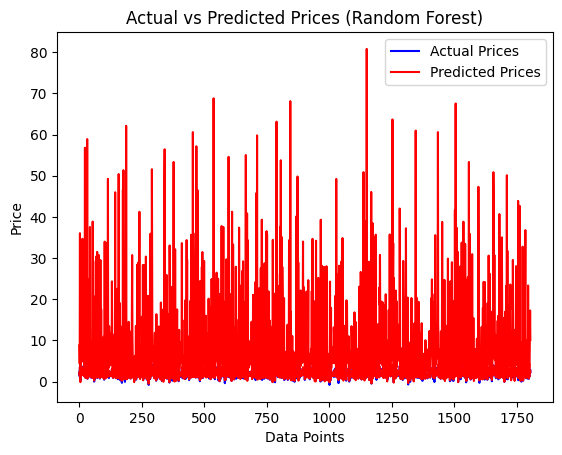

In [106]:
import matplotlib.pyplot as plt

# Predict on the selected test features
y_pred_rf = rf_model.predict(X_test_selected)

# Create a range of data points
data_points = range(len(y_pred_rf))

# Plotting the actual prices as a line
plt.plot(data_points, y_test['Price_Log'].values, color='blue', label='Actual Prices')

# Plotting the predicted prices as a line
plt.plot(data_points, y_pred_rf, color='red', label='Predicted Prices')

plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices (Random Forest)')

# Create a single legend for actual and predicted prices
plt.legend(['Actual Prices', 'Predicted Prices'])

plt.show()

## **Executive Summary:**

- This project proposes the Random Forest model for price prediction for the sale price of used cars. The data comes to us in Cities across India. The suggested model boasts a high predictability and low error. It's important to note that this model is specific to the dataset and conditions in Cities across India. The performance and feature importance may vary when applied to other regions or countries. 
- Therefore, it is recommended to assess the model's performance in the specific context of the target region before making any conclusive decisions based on the results. It is recommended that stakeholders consider these variables in building improved price prediction forecasting, as well as context to each region.

## **Problem Summary:**

- A used car company wants to be able to predict the price of used cars so they can set competitive pricing and not overpay for the cars they purchase. This will help drive demand and keep margins profitable so the company remains in business.

- A company doesn’t want to purchase cars that are going to take up space by sitting on the lot for a long time. By understanding the expected value of different car models, the company can use this data to make decisions about which cars to acquire or if they need to lower or raise the price.



## **Recommendations for implementation:**

- We explored Linear Regression, OLS (Ordinary Least Squared), Ridge/Lasso, Decision Trees and Random Forest models. The final solution is using the Random Forest model. Figure 1 shows the best model, which yields very low RMSE (0.97 AND 2.74 for training and test data, respectively). This model was effective in capturing the price of used cars on our prediction model which yields a high R-Squared (98.7% and 91.2% for training and test data, respectivley).

 

## Analysis and Key Insights:

- The top 5 features that accurately predict the price of used cars are the Power, Year, Engine, New price and Mileage. 

- If a company can find ‘value’ or a car that has more margin from what they pay compared to what a customer is willing to pay, they can maximize their profitability.

- By having price prediction capabilities, you will have an edge in the market. You can offer slightly better prices compared to your competition or purchase more inventory in cars that have both demand and margin.

- Price prediction will help with market trends, demand, price sensitivity and decisions on utilizing cash flow.

## Limitations and Recommendations:

- Assuming the macro environment maintains relatively stable, our model is likely to be accurate and useful in the short-medium term- 2-5 years. However, changes in interest rate policy, taxes, ESG mandates, EV tax credits, inflation, and seasonality are risks to our model. 

- For example, historically general inflation runs around 2%, given the recent money printing and lack of used car supply, we saw used car inflation hit 7.3% YoY in 2022. These factors are not reflected in our used car price dataset, they could be considered in the longer-term forecasting of used car prices.

- Therefore, for more accurate long-term projections, it would be necessary to include variables pertaining to the macro-economic environment as they reflect larger trends in the economy. 